In [2]:
import pandas as pd
import numpy as np
import datetime
import time
import os
import matplotlib.pyplot as py

In [3]:
# data dictionary
'''
    用户标识（uId）匿名化处理后的用户唯一标识（ID取值从1000001开始，依次递增）----------------------!!! 有序列表
    应用标识（appId）匿名化处理后的app唯一标识
    使用时长（duration）1天内用户对某app的累计使用时长
    打开次数（times）1天内用户对某app的累计打开次数
    使用日期（use_date）用户对某app的使用日期
'''

'\n    用户标识（uId）匿名化处理后的用户唯一标识（ID取值从1000001开始，依次递增）\n    应用标识（appId）匿名化处理后的app唯一标识\n    使用时长（duration）1天内用户对某app的累计使用时长\n    打开次数（times）1天内用户对某app的累计打开次数\n    使用日期（use_date）用户对某app的使用日期\n'

In [4]:
# function blocks:
def dateToInt(minDate='2019-02-01',maxDate='2019-04-30'):
    '''
    for cleaning the datetime-type data
    start from 0 increasingly by 1
    '''
    d = {}
    i = 1
    start = datetime.datetime.strptime(minDate,'%Y-%m-%d')
    end = datetime.datetime.strptime(maxDate,'%Y-%m-%d')
    time = start
    while time <= end:
        d[datetime.datetime.strftime(time,'%Y-%m-%d')]=i
        time = time + datetime.timedelta(1)
        i+=1
#     print(np.array([str(v)+' : '+str(k) for k,v in d.items()],dtype='str').reshape(-1,1)) # meanning of integer
    return d


def mapToInt(ls):
    '''
    for cleaning the uId
    translate the uId to integer
    '''
    d={}
    i=1
    for v in ls:
        if v in d:
            pass
        else:
            d[v]=i
            i+=1
#     print(np.array([str(v)+' : '+str(k) for k,v in d.items()],dtype='str').reshape(-1,1))
    return d

def fileSlice(filepath='./user_app_usage.csv',CHUNK_SIZE = 10000000):
    '''
    for slicing file into many small files, default size of small file is 20*CHUNKSIZE
    output file name is
    '''
    reader = pd.read_csv(filepath, iterator=True, names=['uId','appId','duration','times','use_date'])
    
    EOF = True
    i = 0
    s = 0
    start = time.time()
    count = 0
    while EOF:
        try:
            chunk = reader.get_chunk(CHUNK_SIZE)
            i+=1
            gap = time.time()
            s=s+gap-start
            print(i,' time gap:',gap-start,' all time:',s,chunk.shape)
            start = gap
            chunk.to_csv('{0}_{1}.csv'.format(os.path.splitext(os.path.basename(filepath))[0],i//20+1),header = False, mode='a')

        except:
            EOF = False
            print('end of file')
            print(i*CHUNK_SIZE)

def appIdMapToInt(chunk,dic):
    '''
    covert the appId to integer in chunk
    '''
    dic_appId_int = dic #
    def chage(x):
        x[1]=dic_appId_int[x[1]]
        return x
    chunk = chunk.apply(chage,axis=1)
    np.save('dic_appId_int',dic) # save the map of appId and integer to file
    return chunk,'dic_appId_int.npy'

In [5]:
# data cleaning:

In [23]:
rdc = pd.read_csv('./uau_4.csv',names=['uId','appId','duration','times','use_date'],header=1)

print(rdc)
# print(rdc.tail(5))
return
start = time.time()

cdf = c = rdc.get_chunk(10000000)


i=0
try:
    while True:
        c = rdc.get_chunk(10000000)
        if i==0:
            cdf.drop(['duration','times','use_date'],axis=1,inplace = True)
        else:
            c.drop(['duration','times','use_date'],axis=1,inplace = True)
            cdf = cdf.append(c)
        i+=1
        if i%3==0:
            print(i)
except:
    print('end of file')
finally:
    end = time.time()
    print(cdf,end-start,i)





MemoryError: 

In [173]:
### process the date column

rd = pd.read_csv('./uau_4.csv',iterator=True, names=['uId','appId','duration','times','use_date'])
chunk = rd.get_chunk(1000000)

dic_date_int = dateToInt(chunk.values[:,4].min(),chunk.values[:,4].max())

start = time.time()

for k,v in dic_date_int.items():
    chunk.replace(k,v,inplace=True) # the reason for use_date replace operation is fast is that the data cluster massively

end = time.time()

print(chunk,end-start)



               uId      appId  duration  times  use_date
590000000  2345916  a00275200      17.0   10.0        17
590000001  2345916  a00287397      22.0    5.0        11
590000002  2345916  a00274701   11001.0  368.0        24
590000003  2345916  a00289866     678.0   15.0        25
590000004  2345916  a00275200    1217.0   19.0        25
590000005  2345916  a00311680       3.0    1.0         7
590000006  2345916  a00275200     258.0   61.0         1
590000007  2345916  a00336224       6.0    4.0        15
590000008  2345916  a00289826      52.0    4.0        20
590000009  2345916  a00450743     107.0    2.0        19
590000010  2345916  a00287397      77.0    9.0        20
590000011  2345916  a00289866     678.0   15.0        26
590000012  2345916  a00274701    1519.0   89.0        25
590000013  2345916  a00289519     233.0   12.0         1
590000014  2345916  a00311680      22.0    2.0         5
590000015  2345916  a00289826     235.0    8.0        13
590000016  2345916  a00275200  

In [220]:
# file: app_info


df_app = pd.read_csv('./app_info.csv')
d = dict(zip(df_app.values[:,0],df_app.values[:,1]))
s = pd.unique(df_app.values[:,1])
dic_apptype_int=mapToInt(s)
# print(np.array([str(v)+' : '+str(k) for k,v in dic_apptype_int.items()],dtype='str').reshape(-1,1))

# why a-b != empty ????????
a = set(chunk.values[:,1])
b = set(df_app.values[:,0])
print('the number appId in user_app_usage but not in app_info: ',len(a - b))


# slow: the best choice is cope with it separately

# def extend(r):
#     r['app_type']=dic_apptype_int[d[r['appId']]] if r['appId'] in d else 0
#     return r
# print(chunk.apply(extend,axis=1))



the number appId in user_app_usage but not in app_info:  3880
               uId      appId  duration  times  use_date  app_type
590000000  2345916  a00275200      17.0   10.0        17         1
590000001  2345916  a00287397      22.0    5.0        11        13
590000002  2345916  a00274701   11001.0  368.0        24        18
590000003  2345916  a00289866     678.0   15.0        25         4
590000004  2345916  a00275200    1217.0   19.0        25         1
590000005  2345916  a00311680       3.0    1.0         7        14
590000006  2345916  a00275200     258.0   61.0         1         1
590000007  2345916  a00336224       6.0    4.0        15        14
590000008  2345916  a00289826      52.0    4.0        20        13
590000009  2345916  a00450743     107.0    2.0        19        12
590000010  2345916  a00287397      77.0    9.0        20        13
590000011  2345916  a00289866     678.0   15.0        26         4
590000012  2345916  a00274701    1519.0   89.0        25        18


In [176]:
# process the appId —— convert appId to integer


# start = time.time()
dic_appId_int = mapToInt(chunk.values[:,1])
# chunk=appIdMapToInt(chunk,dic_appId_int)
# end = time.time()
# print(chunk,end-start)

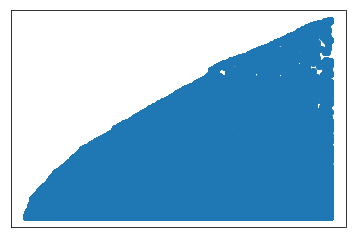

In [180]:
# x: uId, y: appId


py.yticks([])
py.xticks([])
py.scatter(chunk.head(10000000).values[:,0],chunk.head(10000000).values[:,1])

In [184]:

print('number of user: ',len(dic_user_int))
print('number of app: ',len(dic_appId_int))

# chunk[['appId']] = chunk[['appId']].astype('str')
# chunk.sort_values(by=['uId','appId'],inplace=True)
tmp = chunk.groupby(['uId'])
print(tmp.describe())


number of user:  3061
number of app:  13110
        duration                                                          \
           count          mean           std      min       25%      50%   
uId                                                                        
2345916    349.0   1101.762178   2607.065887      1.0     52.00    170.0   
2345960      9.0   1556.666667   2723.565402      5.0     92.00    213.0   
2346245    660.0   1133.275758   1752.772189      1.0     66.25    276.0   
2346270    303.0   2317.646865   4917.231635      1.0     89.50    375.0   
2347548    161.0   4669.173913   6542.881130      2.0    123.00   1781.0   
2347748    753.0    689.934927   1310.026201      1.0     46.00    154.0   
2347914    683.0   2013.903367   3999.379355      1.0     97.50    386.0   
2348404    317.0   1539.621451   2785.959888      1.0     28.00    149.0   
2348554    285.0   3318.287719   8355.424740      1.0     85.00    231.0   
2348682    234.0   1753.435897   3685.162808

In [8]:
# extract the feature:
###  the best choice is to use different columns when extract particular features separately
###  the feature list is including as below:

###  uid,
###  appId,category，
###  duration, dur_max, dur_min, dur_var, dur_mean
###  times,times_max, times_min, times_var, times_mean
###  use_date, ud_count,
start = time.time()



end = time.time()

# print(chunk,end-start)
